In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import axis

In [179]:
class Ridge:
    def __init__(self, alpha = 1):
        self.w = None
        self.alpha = alpha
    
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis = 1)
        #大きさ説明変数の数の単位行列
        #np.eye(n) n×nの単位行列
        I = np.eye(X.shape[1])
        #np.linalg.inv() 逆行列
        self.w = np.linalg.inv(X.T @ X + self.alpha*I) @ X.T @ y

    def predict(self, X):
        X = np.insert(X, 0, 1,axis=1)
        return X @ self.w

In [191]:
x1 = np.array([0, 0.11, 0.22, 0.33, 0.44, 0.56, 0.67, 0.78, 0.89, 1.0])
#目的変数
y = np.array([[-0.054, 0.495, 0.999, 0.882, 0.374, -0.269, -0.907, -0.812, -0.91, -0.041]]).T
#10行4列行列の説明変数作成 
X = np.array([[x**4, x**3, x**2, x] for x in x1])
df = pd.DataFrame(data = X,columns=["x4", "x3", "x2", "x1"])
df["y"]  = y
print(df)

         x4        x3      x2    x1      y
0  0.000000  0.000000  0.0000  0.00 -0.054
1  0.000146  0.001331  0.0121  0.11  0.495
2  0.002343  0.010648  0.0484  0.22  0.999
3  0.011859  0.035937  0.1089  0.33  0.882
4  0.037481  0.085184  0.1936  0.44  0.374
5  0.098345  0.175616  0.3136  0.56 -0.269
6  0.201511  0.300763  0.4489  0.67 -0.907
7  0.370151  0.474552  0.6084  0.78 -0.812
8  0.627422  0.704969  0.7921  0.89 -0.910
9  1.000000  1.000000  1.0000  1.00 -0.041


0    0.00
1    0.11
2    0.22
3    0.33
4    0.44
5    0.56
6    0.67
7    0.78
8    0.89
9    1.00
Name: x1, dtype: float64

In [181]:
#数理モデル完成
ridge = Ridge(alpha=0.0001)
ridge.fit(X,y)

In [190]:
#テスト
test_X = [[0.75**4, 0.75**3, 0.75**2, 0.75]]
print(f"x = 0.75\npredict: y = {ridge.predict(test_X)} \nweigh: {ridge.w.T}".replace("[","").replace("]",""))

x = 0.75
predict: y = -0.97805172 
weigh:  -0.06150318   9.87412627   0.34886273 -18.40143779   8.21713132


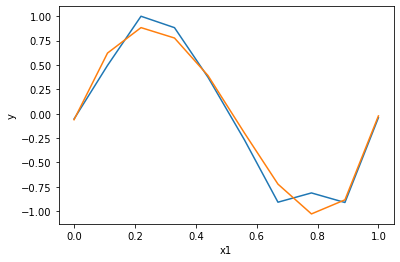

In [211]:
#グラフ
fig = plt.figure()
ax = fig.add_subplot(xlabel = "x1",ylabel = "y")
ax.plot(df["x1"],df["y"])
ax.plot(df["x1"],ridge.predict(X))